In [2]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/MyDrive/AIM')
gdrive_path = '/content/gdrive/MyDrive/AIM'
!ls -l /content/gdrive/MyDrive/AIM/*.py
import aim_util
import aim_xformer

Mounted at /content/gdrive
-rw------- 1 root root  343 May 29 20:28 /content/gdrive/MyDrive/AIM/aim_overlayer.py
-rw------- 1 root root 9016 May 30 22:09 /content/gdrive/MyDrive/AIM/aim_scanner.py
-rw------- 1 root root 7072 May 30 22:09 /content/gdrive/MyDrive/AIM/aim_util.py
-rw------- 1 root root 7441 May 30 22:09 /content/gdrive/MyDrive/AIM/aim_xformer.py


In [ ]:
#!cat /content/gdrive/MyDrive/AIM/aim_xformer.py

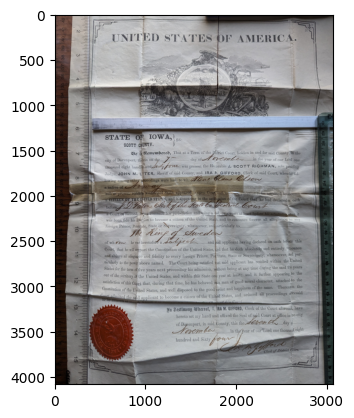

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

gdrive_path = '/content/gdrive/MyDrive/AIM'
base_name = 'citizen_1864_xform0'
image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'

#aim_util.show_image(image_path)
img = mpimg.imread(image_path)
plt.imshow(img)


In [4]:
import cv2
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [5]:
###############################################################################
# base transforms
#
# xform1 - applying grayscale conversion
def grayscale(img, intensity=0.0):
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if intensity > 0.0:
        img1 = cv2.multiply(img1, intensity)
    return img1

# xform2 - applying thresholding
def threshold(img, thresh_val=127, thresh_type=cv2.THRESH_BINARY):
    ret, thresh = cv2.threshold(img, thresh_val, 255, cv2.THRESH_BINARY)
    return thresh

# xform3 - applying noise reduction using Gaussian Blur
def noise_reduction(img, kernel_size=5):
    blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    return blurred

# xform4 - applying sharpening using Laplacian operator
def sharpen(img, kernel_size=3):
    sharpened = cv2.Laplacian(img, cv2.CV_8U, ksize=kernel_size)
    sharpened = cv2.add(img, sharpened, 1.0)
    return sharpened

# xform5 -adjusting contrast and brightness
def contrast_and_brightness(img, contrast_factor=1.0, brightness_factor=0):
    contrast_adjusted = img * contrast_factor
    brightness_adjusted = contrast_adjusted + brightness_factor
    return np.clip(brightness_adjusted, 0, 255)

In [6]:
###############################################################################
def apply_xform(image_path):
    # read image
    img = mpimg.imread(image_path)

    # Perform the image transformations
    gray_img = grayscale(img)
    thresh_img = threshold(img)
    noise_reduced_img = noise_reduction(img)
    sharpened_img = sharpen(img)
    adjusted_img = contrast_and_brightness(img, 1, 0)

    # save the transformed images
    gdrive_path = '/content/gdrive/MyDrive/AIM/'
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform1.jpg'), gray_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform2.jpg'), thresh_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform3.jpg'), noise_reduced_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform4.jpg'), sharpened_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform5.jpg'), adjusted_img)

    # Create a list to store the transformed images
    transformed_images = []

    # 1. Grayscale Conversion
    transformed_images.append(gray_img)
    transformed_images.append(thresh_img)
    transformed_images.append(noise_reduced_img)
    transformed_images.append(sharpened_img)
    transformed_images.append(adjusted_img)

    # Display the images side by side
    for i in range(0, len(transformed_images)):
        plt.subplot(1, len(transformed_images), i + 1)
        plt.title("Transform " + str(i + 1))
        plt.imshow(transformed_images[i], cmap='gray')
        plt.axis('off')
        # save_image_name = '/content/gdrive/MyDrive/AIM/citizen_xform_' + str(i) + '.jpg'
        # plt.savefig(save_image_name)
    plt.show()

In [14]:
###############################################################################
# apply grayscale multiple times with varying intensity
# image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'

def apply_grayscale(image_path, intensity_a=0.7, intensity_b=1.3, intensity_c=1.8):
    # read image
    img = mpimg.imread(image_path)

    # Load an image
    image = img
    # image = cv2.imread('your_image.jpg')  # Replace 'your_image.jpg' with your image file

    # Apply grayscale multiple times with varying intensity
    result1 = grayscale(image)
    result2 = grayscale(image, intensity_a)
    result3 = grayscale(image, intensity_b)
    result4 = grayscale(image, intensity_c)

    # result2 = cv2.multiply(grayscale(image), intensity_a)  # Slightly darker
    # result3 = cv2.multiply(grayscale(image), intensity_b)  # Slightly brighter

    # Display images side-by-side
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # Adjust figsize if needed

    axes[0].imshow(result1, cmap='gray')
    axes[0].set_title('Grayscale 0')
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform1a.jpg'), result1)

    axes[1].imshow(result2, cmap='gray')
    axes[1].set_title('Grayscale 1 (Darker)')
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform1b.jpg'), result2)

    axes[2].imshow(result3, cmap='gray')
    axes[2].set_title('Grayscale 2 (Brighter)')
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform1c.jpg'), result3)

    axes[3].imshow(result4, cmap='gray')
    axes[3].set_title('Grayscale 3 (Brighter)')
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform1d.jpg'), result3)

    plt.show()

In [8]:
def apply_xform_threshold(gdrive_path, image_path):
    # read image
    img = mpimg.imread(image_path)

    transformed_images = []
    # try varying key input Laplacian parameters: threshold value, type
    thresh_img = threshold(img)
    transformed_images.append(thresh_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform2a.jpg'), thresh_img)
    thresh_img = threshold(img, thresh_val=50)
    transformed_images.append(thresh_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform2b.jpg'), thresh_img)
    thresh_img = threshold(img, thresh_val=200, thresh_type=cv2.THRESH_BINARY_INV)
    transformed_images.append(thresh_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform2c.jpg'), thresh_img)
    thresh_img = threshold(img, thresh_val=127, thresh_type=cv2.THRESH_TRUNC)
    transformed_images.append(thresh_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform2d.jpg'), thresh_img)
    thresh_img = threshold(img, thresh_val=75, thresh_type=cv2.THRESH_TOZERO_INV)
    transformed_images.append(thresh_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform2e.jpg'), thresh_img)
    thresh_img = threshold(img, thresh_val=170, thresh_type=cv2.THRESH_OTSU)
    transformed_images.append(thresh_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform2f.jpg'), thresh_img)

    # Display the images side by side
    for i in range(0, len(transformed_images)):
        plt.subplot(1, len(transformed_images), i + 1)
        plt.title("Transform" + str(i))
        plt.imshow(transformed_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

In [9]:
def apply_xform_sharpen(gdrive_path, image_path):
    # read image
    img = mpimg.imread(image_path)

    transformed_images = []
    # vary sharpen kernal sze
    sharpened_img = sharpen(img, 5)
    transformed_images.append(sharpened_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform4a.jpg'), sharpened_img)
    sharpened_img = sharpen(img, 11)
    transformed_images.append(sharpened_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform4b.jpg'), sharpened_img)

    # Display the images side by side
    for i in range(0, len(transformed_images)):
        plt.subplot(1, len(transformed_images), i + 1)
        plt.title("xform " + str(i + 1))
        plt.imshow(transformed_images[i], cmap='gray')
        plt.axis('off')
    plt.show()


In [10]:
def apply_xform_contrast_and_brightness(gdrive_path, image_path):
    # read image
    img = mpimg.imread(image_path)

    transformed_images = []
    # vary contrast_and_brightness inputs
    adj_img = contrast_and_brightness(img, contrast_factor=1, brightness_factor=0)  # default
    transformed_images.append(adj_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform5a.jpg'), adj_img)
    adj_img = contrast_and_brightness(img, contrast_factor=1, brightness_factor=32)
    transformed_images.append(adj_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform5b.jpg'), adj_img)
    adj_img = contrast_and_brightness(img, contrast_factor=2, brightness_factor=64)
    transformed_images.append(adj_img)
    cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform5c.jpg'), adj_img)

    # Display the images side by side
    for i in range(0, len(transformed_images)):
        plt.subplot(1, len(transformed_images), i + 1)
        plt.title("xform " + str(i))
        plt.imshow(transformed_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# **Apply All Transforms**

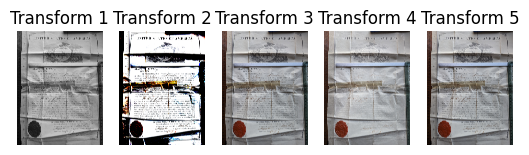

In [11]:
#aim_xformer.trial_xform(image_path)
apply_xform(image_path)

In [12]:
!ls -l /content/gdrive/MyDrive/AIM/citizen_xform*

-rw------- 1 root root  3890679 May 31 20:31 /content/gdrive/MyDrive/AIM/citizen_xform1.jpg
-rw------- 1 root root  4282849 May 30 22:11 /content/gdrive/MyDrive/AIM/citizen_xform2a.jpg
-rw------- 1 root root  2761919 May 30 22:11 /content/gdrive/MyDrive/AIM/citizen_xform2b.jpg
-rw------- 1 root root  2284600 May 30 22:11 /content/gdrive/MyDrive/AIM/citizen_xform2c.jpg
-rw------- 1 root root  4282849 May 30 22:11 /content/gdrive/MyDrive/AIM/citizen_xform2d.jpg
-rw------- 1 root root  3566273 May 30 22:11 /content/gdrive/MyDrive/AIM/citizen_xform2e.jpg
-rw------- 1 root root  5360323 May 30 22:11 /content/gdrive/MyDrive/AIM/citizen_xform2f.jpg
-rw------- 1 root root  4282849 May 31 20:31 /content/gdrive/MyDrive/AIM/citizen_xform2.jpg
-rw------- 1 root root  2669393 May 31 20:31 /content/gdrive/MyDrive/AIM/citizen_xform3.jpg
-rw------- 1 root root 10504136 May 30 22:11 /content/gdrive/MyDrive/AIM/citizen_xform4a.jpg
-rw------- 1 root root 11336471 May 30 22:11 /content/gdrive/MyDrive/AIM/

# **Greyscale**

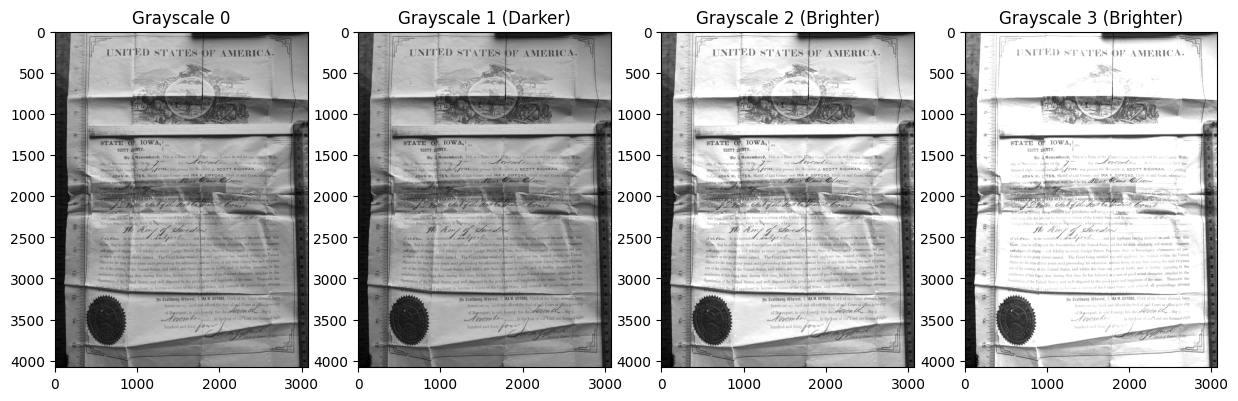

In [15]:
#aim_xformer.apply_grayscale(image_path, 0.5, 1.8)
apply_grayscale(image_path, 0.5, 1.3, 1.8)

# **Threshold**

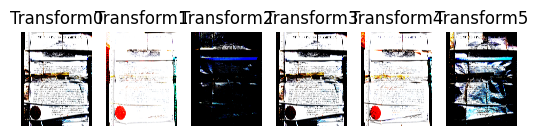

In [26]:
#aim_xformer.trial_xform_threshold(gdrive_path, image_path)
apply_xform_threshold(gdrive_path, image_path)

# **Sharpen**

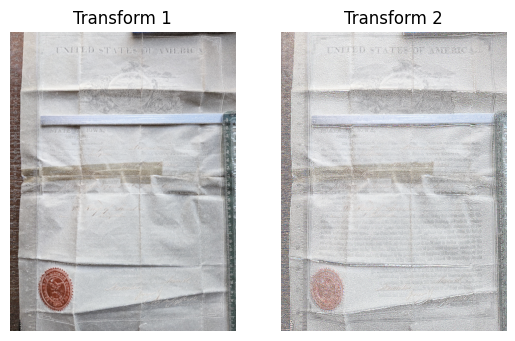

In [15]:
#aim_xformer.trial_xform_sharpen(gdrive_path, image_path)
apply_xform_sharpen(gdrive_path, image_path)

# **contrast_and_brightness**

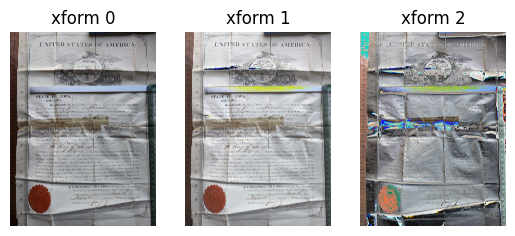

In [34]:
apply_xform_contrast_and_brightness(gdrive_path, image_path)

##########################################################################